1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df= pd.read_csv("../data/iris.csv")
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['variety'].values

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [6]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
variety_encoded = le.fit_transform(df['variety'].values)
# Setosa: 0, Versicolor: 1, Virginica: 2
print(variety_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
y = np.array(variety_encoded)
y.shape

(150,)

In [31]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [8]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
X.shape

(150, 4)

In [9]:
from sklearn.model_selection import train_test_split
# Divido el dataset entre conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [13]:
# Genero el modelo
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=3)

# Entreno el modelo utilizando el conjunto de entrenamiento X_train e y_train
model3.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Otra forma de hacerlo seria con una función donde elegimos el modelo y lo entrenamos y retorna el modelo ya entrenado.
#def modelo_knn(n_neighbors, X_set, y_set):
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_set, y_set)
    return model

Mediante knn, predice qué planta se corresponde con los ejemplos: [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3] para k=3 y k=7

In [14]:
# Predicción para [15.7,2.8,9.5,0.1]
predicted3_1 = model3.predict([[15.7,2.8,9.5,0.1]])
print(predicted3_1)
# Predice que la variedad es la 2 = Virginica

[2]


In [16]:
# Predicción para [1.7,3.8,4.5,11.3]
predicted3_2 = model3.predict([[1.7,3.8,4.5,11.3]])
predicted3_2
# Predice que la variedad es la 2 = Virginica

array([2])

In [ ]:
# Tambien se puede hacer con una función para predecir y quitar el encoder
def predicting(X_set, y_set, encoder):
    for bors in [3,7]:
        print("#############")
        print(f"fitting Knn with k={bors}")
        print()
        model = modelo_knn(bors, X_set,y_set)
        print(f"getting a score of {round(model.score(X_set, y_set)*100)}%")
        for pred in [[[15.7,2.8,9.5,0.1]],[[1.7,3.8,4.5,11.3]]]:
            print()
            print(f"for the list: {pred} the prediction is {le.inverse_transform(model.predict(pred))[0]}")
        print("#############")

In [19]:
# Ahora con k=7
# Genero el modelo
from sklearn.neighbors import KNeighborsClassifier
# Lo entreno
model7 = KNeighborsClassifier(n_neighbors=7)
model7.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [20]:
# Predicción para [15.7,2.8,9.5,0.1]
predicted7_1 = model7.predict([[15.7,2.8,9.5,0.1]])
print(predicted7_1)
# Predicción para [1.7,3.8,4.5,11.3]
predicted7_2 = model7.predict([[1.7,3.8,4.5,11.3]])
print(predicted7_2)


[2]
[2]


¿Qué acierto tiene tu modelo para k=3, k=7? (score)

In [39]:
X_test.shape

(30, 4)

In [17]:
y_pred3 = model3.predict(X_test)
y_pred3

array([2, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0,
       1, 0, 1, 1, 2, 2, 0, 0])

In [18]:
# Para k=3 el acierto es:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.9333333333333333


In [21]:
#Para K=7 el acierto es:
y_pred7 = model7.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred7))

Accuracy: 0.9666666666666667


Para k=3 el acierto es del 93.33%  y para k= 7 tienen el acierto es del 96.67 %

-----------
Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.

([<matplotlib.axis.XTick at 0x29199c2bac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

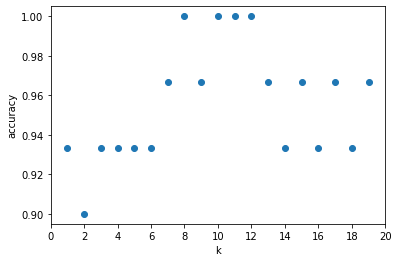

In [22]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])

Como se puede comprobar en el gráfico superior el mayor acierto se consigue con k=8, 10, 11, 12. 
Lo compruebo entrenando el modelo con k=8

In [23]:
model8 = KNeighborsClassifier(n_neighbors=8)
model8.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=8)

In [25]:
y_pred8 = model8.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred8))

Accuracy: 1.0


# Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [26]:
from sklearn.model_selection import train_test_split
# Divido el dataset entre conjunto de entrenamiento y de test
X46_train, X46_test, y46_train, y46_test = train_test_split(X, y, test_size=0.60)
print(X46_train.shape)
print(X46_test.shape)

(60, 4)
(90, 4)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

model_60 = KNeighborsClassifier(n_neighbors=7)

# Entreno el modelo utilizando el conjunto de entrenamiento X_train e y_train
model_60.fit(X46_train, y46_train)  

KNeighborsClassifier(n_neighbors=7)

In [29]:
y_pred60_7 = model_60.predict(X46_test)
print("Accuracy:", metrics.accuracy_score(y46_test, y_pred60_7))

Accuracy: 0.9666666666666667


Cambian los resultados, el acierto se ha reducido, antes era del 100 % y ahora es del 96.67%. Posiblemente sea porque antes el entrenamiento del modelo era mejor al tener más valores